# 迭代函数系统

In [1]:
import numpy as np, matplotlib.pyplot as plt

## 赛平斯三角
A, B, C为三角形的顶点，三个概率$P_A=1/3, P_B=1/3, P_C=1/3$。
在三角形内部任取一点$Z$, 按照以下式子进行迭代：
$$Z_{n+1}=\left\{\begin{align}&\frac{Z_n+A}{2}, 以概率P_A\\
&\frac{Z_n+B}{2}, 以概率P_A\\
&\frac{Z_n+C}{2}, 以概率P_A
\end{align}\right.$$

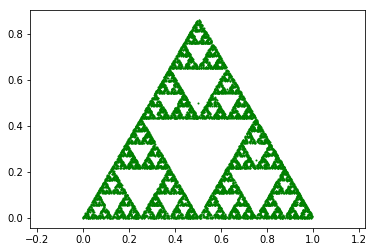

In [2]:
tri = np.array([0j, 1.0, 0.5+np.cos(np.pi/6)*1j])
N = 10000
Z=np.zeros(N,complex)
Z[0] = .5+.5j
for i in range(1,N):
    Z[i] = 0.5*Z[i-1]+0.5*np.random.choice(tri,p=[1/3,1/3,1/3])
plt.plot(Z.real,Z.imag,'go',ms=1)
axis = plt.axis('equal')

In [3]:
%matplotlib qt5
from matplotlib import animation
plt.close('all')
fig = plt.figure()
plt.axis(axis)
mypoint, = plt.plot([],[],'bo',ms=1)
def animate(i):
    mypoint.set_data(Z[:10*i].real, Z[:10*i].imag)
    return mypoint

anim=animation.FuncAnimation(fig,animate,frames=N//10, interval=1)   

## 羊齿叶图案(Barnsley's Fern)

$$\begin{pmatrix} x\\y \end{pmatrix}_{n+1}=\left\{
\begin{align}
&\begin{pmatrix} 0.5\\0.27y_n \end{pmatrix}&2\%\\
&\begin{pmatrix} -0.139x_n+0.263y_n+0.57\\0.246x_n + 0.224y_n-0.036 \end{pmatrix}&15\%\\
&\begin{pmatrix} 0.17x_n-0.215y_n+0.408\\0.222x_n + 0.176y_n+0.0893 \end{pmatrix}&13\%\\
&\begin{pmatrix} 0.781x_n+0.034y_n+0.1075\\-0.032x_n + 0.739y_n+0.27 \end{pmatrix}&70\%\\
\end{align}\right.$$

程序一

In [4]:
def f(x,y):
    return np.array(([0.5,0.27*y],[-0.139*x+0.263*y+0.57, 0.246*x+0.224*y-0.036], 
           [0.17*x-0.215*y+0.408, 0.222*x+0.176*y+0.0893], [0.781*x+0.034*y+0.01075, -0.032*x+0.739*y+0.27]))
N = 10000
x = np.zeros(N)
y = np.zeros(N)
p = [0.02,0.15,0.13,0.7]
a = [0,1,2,3]
for i in range(1,N):
    ii = np.random.choice(a,p=p)
    x[i], y[i] = f(x[i-1],y[i-1])[ii]

(-0.04033489064192258,
 0.8470327034803742,
 -0.05038766165895563,
 1.0581408948380682)

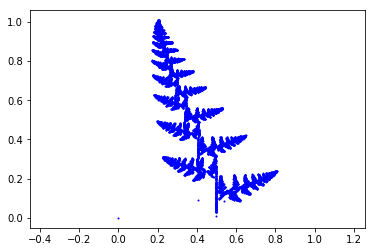

In [5]:
%matplotlib inline
plt.plot(x,y,'bo',ms=1)
plt.axis('equal')

程序2

In [6]:
N=10000
xout,yout=[],[]
for i in range(N):
    r = np.random.random()
    if r<0.02:
        x = 0.5
        y = 0.27*y
    elif r<=0.17:
        x = -0.139*x+0.263*y+0.57
        y = 0.246*x+0.224*y-0.036
    elif r<=0.3:
        x = 0.17*x-0.215*y+0.408
        y = 0.222*x+0.176*y+0.0893
    else:
        x = 0.781*x+0.034*y+0.01075
        y = -0.032*x+0.739*y+0.27
    xout.append(x)
    yout.append(y)

程序3

In [7]:
N=100000
x=np.zeros(N)
y = np.zeros(N)

for i in range(1,N):
    r = np.random.random()
    if r<0.01:
        x[i] = 0
        y[i] = 0.16*y[i-1]
    elif r<=0.08:
        x[i] = 0.2*x[i-1]-0.26*y[i-1]
        y[i] = 0.23*x[i-1]+0.22*y[i-1]+1.6
    elif r<=0.15:
        x[i] = -0.15*x[i-1]+0.28*y[i-1]
        y[i] = 0.26*x[i-1]+0.24*y[i-1]+0.44
    else:
        x[i] = 0.85*x[i-1]+0.04*y[i-1]
        y[i] = -0.04*x[i-1]+0.85*y[i-1]+1.6

(-2.4230886230464166,
 2.897634236178013,
 -0.49991232764892307,
 10.498158880627384)

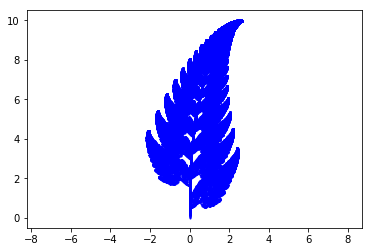

In [8]:
plt.plot(x,y,'bo',ms=1)
plt.axis('equal')

In [9]:
def ifs(p, eq, init, n):
    """
    迭代函数系统
    p: 每个函数的选择概率表
    eq: 迭代函数列表
    init: 迭代初始点
    n: 迭代次数
    
    返回值：
    每次迭代所得的x坐标，y坐标，计算所用的函数下标
    """
    
    #迭代向量初始化
    pos = np.ones(3, float)
    pos[:2] = init
     
    #通过函数概率，计算函数的选择序列
    irange = [i for i in range(len(p))]
    select = np.random.choice(irange,n,p=p)
    
    #结果的初始化
    result = np.zeros((n,2),float)
    c = np.zeros(n,float)
    
    for i in range(n):
        eqidx = select[i]        #所选函数的下标
        tmp = np.dot(eq[eqidx], pos) #进行迭代
        pos[:2] = tmp            #更新迭代向量
        
        #保存结果
        result[i] = tmp
        c[i] = eqidx
        
    return result, c

# 羊齿叶图案

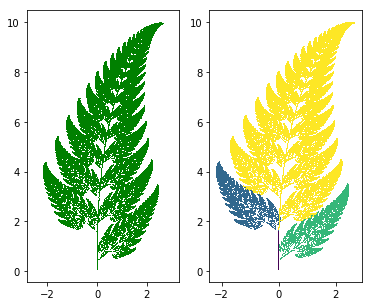

In [10]:
eq1 = np.array([[0,0,0],[0,0.16,0]])
eq2 = np.array([[0.2,-0.26, 0],[0.23,0.22,1.6]])
eq3 = np.array([[-0.15, 0.28,0],[0.26,0.24, 0.44]])
eq4 = np.array([[0.85,0.04,0],[-0.04,0.85,1.6]])
p = [0.01,0.07,0.07,0.85]
data, c = ifs(p, [eq1,eq2,eq3,eq4], [0,0], 100000)
fig, axes = plt.subplots(1,2,figsize=(6,5))
axes[0].scatter(data[:,0],data[:,1],s=1, c="g", marker="s", linewidth=0)
axes[1].scatter(data[:,0],data[:,1],s=1, c=c, marker="s", linewidth=0)
axis = axes[0].axis('equal')

In [11]:
%matplotlib qt5
from matplotlib import animation
plt.close('all')
fig = plt.figure()
plt.axis(axis)
mypoint, = plt.plot([],[],'bo',ms=1)
def animate(i):
    mypoint.set_data(data[:100*i,0],data[:100*i,1])
    return mypoint

anim=animation.FuncAnimation(fig,animate,frames=1000, interval=1)   

### 例6 概率树

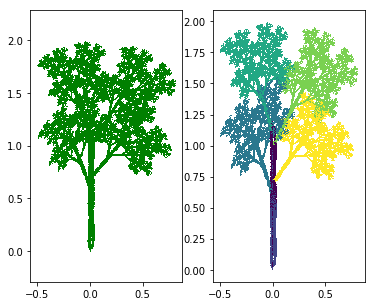

In [12]:
eq1 = np.array([[0.05, 0, 0],[0, 0.6, 0]])
eq2 = np.array([[0.05, 0, 0],[0, -0.5,1.0]]) 
eq3 = np.array([[0.46, -0.15, 0], [0.39,0.38, 0.6]]) 
eq4 = np.array([[0.47,-0.15,0], [0.17,0.42,1.1]])
eq5 = np.array([[0.43,0.28,0],[-0.25, 0.45,1.0]])
eq6 = np.array([[0.42,0.26,0], [-0.35,0.31,0.7]])
p = [0.1,0.1,0.2,0.2,0.2,0.2]
data, c = ifs(p, [eq1,eq2,eq3,eq4,eq5,eq6], [0.,0], 100000)
%matplotlib inline
fig, axes = plt.subplots(1,2,figsize=(6,5))
axes[0].scatter(data[:,0],data[:,1],s=1, c="g", marker="s", linewidth=0)
axes[1].scatter(data[:,0],data[:,1],s=1, c=c, marker="s", linewidth=0)
axis = axes[0].axis('equal')

概率树动画

In [13]:
%matplotlib qt5
from matplotlib import animation
plt.close('all')
fig = plt.figure()
plt.axis(axis)
mypoint, = plt.plot([],[],'go')
def animate(i):
    mypoint.set_data(data[:10*i,0],data[:10*i,1])
    return mypoint

anim=animation.FuncAnimation(fig,animate,frames=10000, interval=1)  

# 8.10分形生长模型

### 8.10.1抛射沉积模型

模拟步骤：

(1) 选择随机变量$r$

(2) 用向量$h(r)$代表$r$处的列的高度

(3) 按下式选择留在下落位置：

$$h_r=\left\{\begin{align}&h_r+1 &(h_r\ge h_{r-1}, h_r\ge h_{r+1})\\
                                   &\max(h_{r-1},h_{r+1})&(h_r< h_{r-1}, h_r<h_{r+1})
                                   \end{align}\right.$$

[Text(0.5, 0, 'x'), Text(0, 0.5, 'h(x)')]

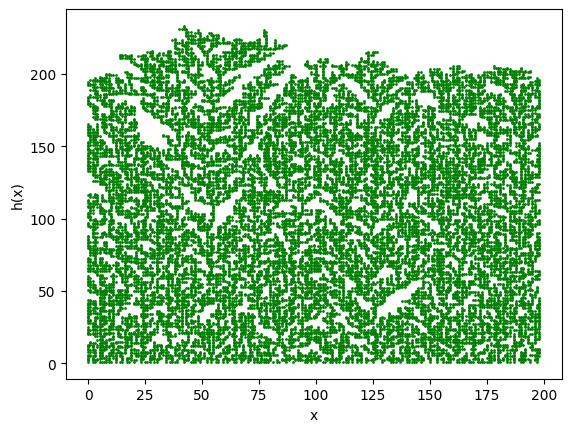

In [13]:
L = 200  #一维空间长度
N =  20000 #一共沉降的粒子数目
h=np.zeros(L) #每个位置的初始高度
x = [] #记录粒子下落的横坐标
y = [] #记录每个粒子下落的高度

for i in range(N):
    n = int(np.random.random()*(L-1)) #随机选择下落位置
    if h[n]>=h[n-1] and h[n]>=h[n+1]:  #下落位置是局部最高点
        h[n] = h[n] + 1   #粒子下落位置在最高处
    else:
        h[n] = max(h[n-1], h[n+1])  #下落位置不是局域最高点，则粒子高度是左右高度的最大值
    x.append(n) #记录落点横坐标
    y.append(h[n]) #记录高度

x = np.array(x)
y = np.array(y)
plt.plot(x,y,'go',ms=1)
ax = plt.gca()
ax.set(xlabel="x", ylabel="h(x)")
#plt.hist2d(x,y,bins=100)

## 8.10.2 森林和薄膜的关联生长

沉积的概率$p$依赖于新增加的粒子到刚才下落粒子之间的距离$d$

$p=cd^\eta$

这里$\eta$是参数，我们取$\eta=-2$, $c$是决定概率大小的常数。

In [15]:
L = 200
N =  200000
h=np.zeros(L)
x,y=[],[]
m = 101  #最初的位置
for i in range(N):
    n = int((L-1)*np.random.random()) #下落位置
    d = (m-n)**2+(h[m] - h[n])**2     #下落位置到刚才下落位置之间的距离的平方
    if d==0: p = 1.
    else: p = 14./d                   #下落概率，c=14
    if np.random.random()<p:          #满足下落概率下落，否则不下落
        if h[n]>=h[n-1] and h[n]>=h[n+1]:
            h[n] = h[n] + 1
        else:
            h[n] = max(h[n-1], h[n+1])
        x.append(n)
        y.append(h[n])
        m = n

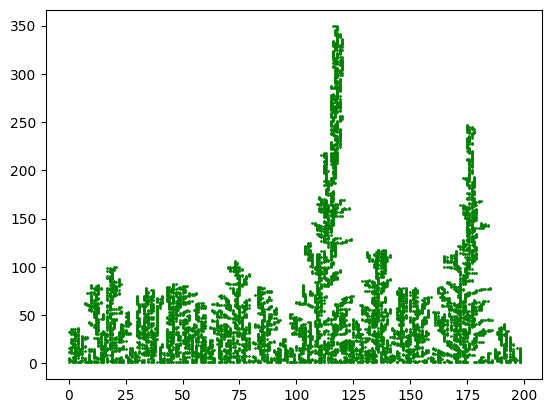

In [16]:
%matplotlib inline
x = np.array(x)
y = np.array(y)
plt.plot(x,y,'go',ms=1)

[Text(0.5, 0, 'x'), Text(0, 0.5, 'h(x)')]

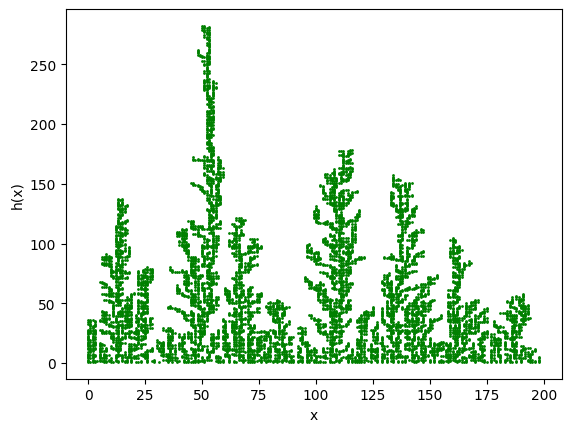

In [17]:
L = 200  #一维空间长度
N =  200000 #一共沉降的粒子数目
h=np.zeros(L) #每个位置的初始高度
x = [] #记录粒子下落的横坐标
y = [] #记录每个粒子下落的高度
m = 101  #选择一个最初的下落位置

for i in range(N):
    n = int(np.random.random()*(L-1)) #随机选择下落位置
    d = (m-n)**2+(h[m] - h[n])**2     #下落位置到刚才下落位置之间的距离的平方
    if d==0: p = 1.
    else: p = 14./d                   #下落概率，c=14
    if np.random.random()<p:          #满足下落概率下落，否则不下落
        if h[n]>=h[n-1] and h[n]>=h[n+1]:  #下落位置是局部最高点
            h[n] = h[n] + 1   #粒子下落位置在最高处
        else:
            h[n] = max(h[n-1], h[n+1])  #下落位置不是局域最高点，则粒子高度是左右高度的最大值
        x.append(n) #记录落点横坐标
        y.append(h[n]) #记录高度
        m = n  #记录当前粒子的下落位置

x = np.array(x)
y = np.array(y)
plt.plot(x,y,'go',ms=1)
ax = plt.gca()
ax.set(xlabel="x", ylabel="h(x)")

### DLA 8.10.3(扩散限制聚集模型) 团簇生长模型

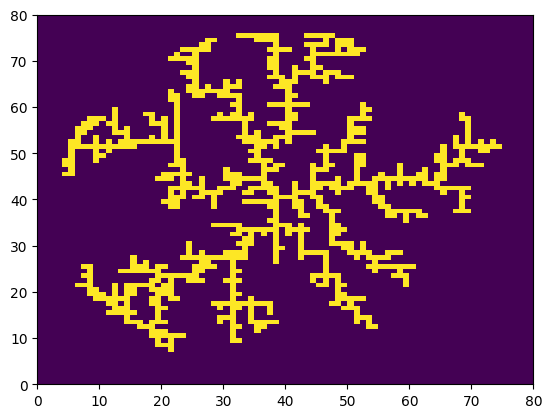

In [18]:
import numpy as np, matplotlib.pyplot as plt
L = 80
N = 4000
u = np.zeros((L, L))
u[L//2,L//2] = 1  #种子放置在中间点
theta = 2*np.pi*np.random.random(N) #随机角度，释放粒子的角度
radius = L//2-L/20  #半径
x1, y1 = radius* np.cos(theta), radius*np.sin(theta)  #释放粒子的坐标，转化成直角坐标
XX = x1 + L//2  #将坐标移动到以[L/2,L/2]为中心的位置
YY = y1 + L//2
for i in range(N):
    flag = 0 #代表行走是否继续的符号
    X = int(XX[i]) #粒子初始在圆周上的横坐标
    Y = int(YY[i]) #粒子初始在圆周上的纵坐标
    s = 1.5e4*np.random.randn() #产生粒子随机运动总距离
    dist = np.abs(s)
    trav = 0  #粒子运动的位置
    while (flag == 0 and X>0 and X<L-1 and Y>0 and Y<L-1 and trav<dist): 
        #粒子可以继续行走flag=0, 粒子在格点范围内：X>0 and X<L-1 and Y>0 and Y<L-1
        #粒子运动的距离小于总距离
        step = np.random.choice([-1,1]) #粒子每一次运动的步长
        if (u[X+1,Y] + u[X-1,Y] + u[X, Y+1] + u[X,Y-1]) >=1: #周围有其他粒子
            flag = 1
            u[X,Y] = 1
        elif np.random.random()<0.5:
            X += step
        else:
            Y += step
        trav += 1 

plt.pcolormesh(u)

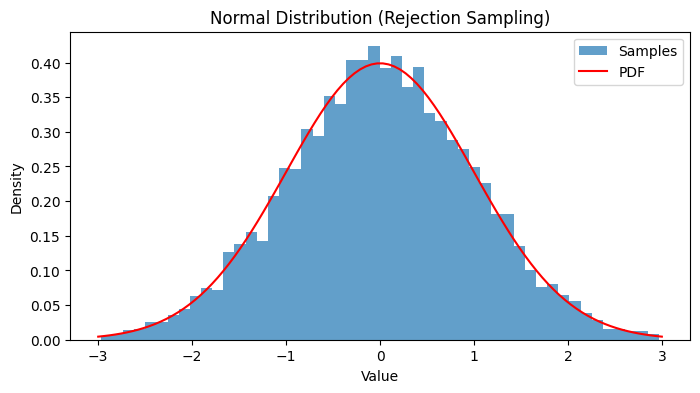